In [ ]:
#import pandas and seaborn libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
#define dataframe(df) as data (importing the data to variable df)
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')


In [ ]:
#get a feel for the table structure and data by looking at the column names
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
#get a feel for the table structure and data by loooking at the column names and rows
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#Question: I would like to see if there are any racial disparities in the number of patients that have been readmitted.

In [ ]:
#create a new dataframe with only selected columns from the 50 that exist 
#keeping 16 columns, not that they will all be used but if a follow up question should arise, best to have retained than to go back
df2 = df[['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'diag_1',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diabetesMed', 'readmitted']]

In [ ]:
#Retained Column Legend
  
#Core data retained for main question
  #'encounter_id' = Unique identifier of an encounter
  #'patient_nbr' = Unique identifier of a patient
  #'race' = Caucasian, Asian, African American, Hispanic, and other
  #'readmitted' = Readmitted Days to inpatient readmission. 
  #               Values: “<30” if the patient was readmitted in less than 30 days, 
  #                       “>30” if the patient was readmitted in more than 30 days, 
  #                       and “No” for no record of readmission

#Suplemental data
  #'gender' = male, female, and unknown/invalid
  #'age' = Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
  #'weight' = Weight in pounds
  #'admission_type_id' = Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
  #'discharge_disposition_id' = Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
  #'admission_source_id' = Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
  #'time_in_hospital' = Integer number of days between admission and discharge
  #'diag_1' = The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
  #'number_outpatient' = Number of outpatient visits of the patient in the year preceding the encounter
  #'number_emergency' = Number of emergency visits of the patient in the year preceding the encounter
  #'number_inpatient' = Number of inpatient visits of the patient in the year preceding the encounter
  #'diabetesMed' = Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”

In [ ]:
#get a feel for the NEW table structure and data by loooking at the column names and rows
df2.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,diag_1,number_outpatient,number_emergency,number_inpatient,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,250.83,0,0,0,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,276,0,0,0,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,648,2,0,1,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,8,0,0,0,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,197,0,0,0,Yes,NO


In [ ]:
#TIP 
#CTRL + M + B ADDS A NEW CODE CELL 
#WHEN USING GOOGLE COLAB

In [ ]:
#before we try to answer our main question, lets take a look at some data charecteristics of race = Hispanic (#Puertorican & Type 2 Diabetic Pride!)
#lets remove all patients who did not identify as Hispanic
dfHispanic = df2[(df2['race']=='Hispanic')] 


In [ ]:
#error check / should see only Hispanic under race column (this method isn't 100% fullproof as we are limited to 5 rows with .head and .tail)
dfHispanic.head()
dfHispanic.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,diag_1,number_outpatient,number_emergency,number_inpatient,diabetesMed,readmitted
101583,441450614,97286517,Hispanic,Male,[50-60),?,1,3,7,7,250.8,0,0,2,Yes,<30
101596,441488810,53835030,Hispanic,Male,[70-80),?,1,3,7,4,428,0,1,3,Yes,>30
101663,442569986,146138783,Hispanic,Female,[50-60),?,1,1,7,3,682,0,0,0,Yes,NO
101684,442687934,31352391,Hispanic,Male,[30-40),?,1,1,7,9,577,0,0,0,Yes,NO
101726,443700206,60201405,Hispanic,Male,[30-40),?,3,3,1,5,348,0,0,0,Yes,NO


In [ ]:
#lets see what statistics we can derive from this sectioned out dataset 
dfHispanic.describe()             

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_emergency,number_inpatient
count,2.037000e+03,2.037000e+03,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000
mean,1.748444e+08,6.154605e+07,2.323515,3.330879,6.144821,4.059892,0.324497,0.228277,0.611193
std,1.159323e+08,4.443959e+07,1.746988,4.967625,3.974889,2.824838,1.322784,0.859150,1.185635
min,2.791716e+06,1.300500e+04,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,7.792709e+07,2.359229e+07,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000
50%,1.505666e+08,5.675710e+07,1.000000,1.000000,7.000000,3.000000,0.000000,0.000000,0.000000
75%,2.582575e+08,9.584839e+07,3.000000,3.000000,7.000000,5.000000,0.000000,0.000000,1.000000
max,4.437002e+08,1.887556e+08,8.000000,28.000000,17.000000,14.000000,28.000000,10.000000,9.000000


In [ ]:
# There are 2,307 rows of data for hispanic patients
# Time in Hospital:
#   * The Mean number of days a hispanic patient stayed in the hospital was 4
#   * The Minimum number of days a hispanic patient stayed in the hospital was 1
#   * The maximum number of days a hispanic patient stayed in the hospital was 14
# Number Outpatient:
#   * The Mean number of outpatient visits a Hispanic patient had the year preceeding their encounter was .32
#   * The Minimum number of outpatient visits a Hispanic patient had the year preceeding their encounter was 0
#   * The maximum number of outpatient visits a Hispanic patient had the year preceeding their encounter was 28
# Number Emergency:
#   * The Mean number of Emergency visits a Hispanic patient had the year preceeding their encounter was .23
#   * The Minimum number of Emergency visits a Hispanic patient had the year preceeding their encounter was 0
#   * The maximum number of Emergency visits a Hispanic patient had the year preceeding their encounter was 10
# Number Inpatient:
#   * The Mean number of inpatient visits a Hispanic patient had the year preceeding their encounter was .61
#   * The Minimum number of inpatient visits a Hispanic patient had the year preceeding their encounter was 0
#   * The maximum number of inpatient visits a Hispanic patient had the year preceeding their encounter was 9


In [ ]:
#now lets get back to business and answer our main question 
#Are there are any racial disparities between race and readmittance?

In [ ]:
#create a new dataframe with only core columns
df3 = df2[['encounter_id', 'patient_nbr', 'race', 'readmitted']]


In [ ]:
#error check / should see only 4 selected columns
df3.head()


,encounter_id,patient_nbr,race,readmitted
0,2278392,8222157,Caucasian,NO
1,149190,55629189,Caucasian,>30
2,64410,86047875,AfricanAmerican,NO
3,500364,82442376,Caucasian,NO
4,16680,42519267,Caucasian,NO


In [ ]:
#get a count of the total rows per race
df3.groupby(['race'])['encounter_id'].count()

race
?                   2273
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
Name: encounter_id, dtype: int64

In [ ]:
#get a count of the total rows per readmitted
df3.groupby(['readmitted'])['encounter_id'].count()

readmitted
<30    11357
>30    35545
NO     54864
Name: encounter_id, dtype: int64

In [ ]:
#checking for multiple instances of same patient, there are 
df3['patient_nbr'].is_unique

False

In [ ]:
#grouping the data in attempts to draw a conclusion
result = df3.groupby(['race','readmitted'])['readmitted'].count()
print(result)

race             readmitted
?                <30             188
                 >30             538
                 NO             1547
AfricanAmerican  <30            2155
                 >30            6634
                 NO            10421
Asian            <30              65
                 >30             161
                 NO              415
Caucasian        <30            8592
                 >30           27124
                 NO            40383
Hispanic         <30             212
                 >30             642
                 NO             1183
Other            <30             145
                 >30             446
                 NO              915
Name: readmitted, dtype: int64


Axes(0.125,0.11;0.775x0.77)


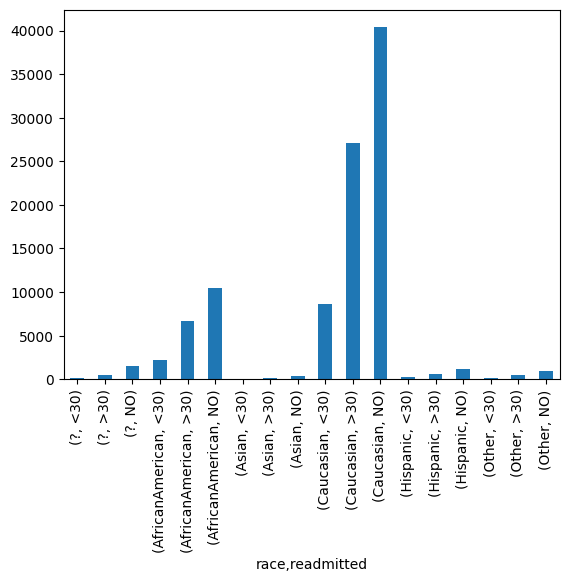

In [ ]:
#it is clear that by just visualizing the row counts a conclution can not be made. 
result = df3.groupby(['race','readmitted'])['readmitted'].count().plot(kind='bar')
print(result)

In [ ]:
#lets remove the ? data under race and save that to a new dataframe
df4 = df3[(df3['race']!='?')] 
print(df4)

        encounter_id  patient_nbr             race readmitted
0            2278392      8222157        Caucasian         NO
1             149190     55629189        Caucasian        >30
2              64410     86047875  AfricanAmerican         NO
3             500364     82442376        Caucasian         NO
4              16680     42519267        Caucasian         NO
...              ...          ...              ...        ...
101761     443847548    100162476  AfricanAmerican        >30
101762     443847782     74694222  AfricanAmerican         NO
101763     443854148     41088789        Caucasian         NO
101764     443857166     31693671        Caucasian         NO
101765     443867222    175429310        Caucasian         NO

[99493 rows x 4 columns]


In [ ]:
#lets remove patient id and save that to a new dataframe
df5 = df4[[ 'encounter_id', 'race', 'readmitted']]
print(df5)

        encounter_id             race readmitted
0            2278392        Caucasian         NO
1             149190        Caucasian        >30
2              64410  AfricanAmerican         NO
3             500364        Caucasian         NO
4              16680        Caucasian         NO
...              ...              ...        ...
101761     443847548  AfricanAmerican        >30
101762     443847782  AfricanAmerican         NO
101763     443854148        Caucasian         NO
101764     443857166        Caucasian         NO
101765     443867222        Caucasian         NO

[99493 rows x 3 columns]


In [ ]:
#lets experiment with grouping methods other than groupby, like pandas pivot table
p_table2 = pd.pivot_table(df5, index= ['race'], columns = ['readmitted'] ,aggfunc = 'count', margins=True)
print(p_table2)

                encounter_id                     
readmitted               <30    >30     NO    All
race                                             
AfricanAmerican         2155   6634  10421  19210
Asian                     65    161    415    641
Caucasian               8592  27124  40383  76099
Hispanic                 212    642   1183   2037
Other                    145    446    915   1506
All                    11169  35007  53317  99493


In [ ]:
#the above pivot data is the closest to how i want to present the data but still need to find a way to normalize the data
#after reviwing methods online, i found the following link: https://absentdata.com/pandas/calculate-percent-in-pandas-pivot-table/
#here i was able to bridge the gap by using the margins=true & div function to get the percent of row total, which normalized the data so a comparison can be made
p_table2.div(p_table2.iloc[:,-1], axis=0 )

encounter_id                         
readmitted               <30       >30        NO  All
race                                                 
AfricanAmerican     0.112181  0.345341  0.542478  1.0
Asian               0.101404  0.251170  0.647426  1.0
Caucasian           0.112906  0.356430  0.530664  1.0
Hispanic            0.104075  0.315169  0.580756  1.0
Other               0.096282  0.296149  0.607570  1.0
All                 0.112259  0.351854  0.535887  1.0

<Axes: xlabel='race'>

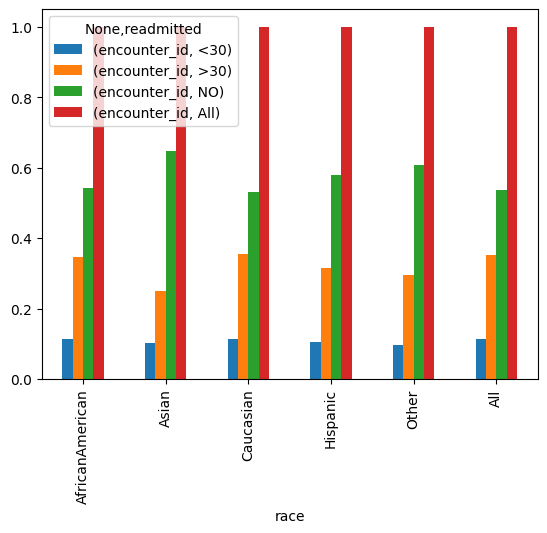

In [ ]:
#although the below does show a similarity, it is a bit "messy" and can be cleaned
p_table2.div(p_table2.iloc[:,-1], axis=0 ).plot(kind='bar')

In [ ]:
#rounding up makes the data more consumable 
np2=np.round(p_table2.div(p_table2.iloc[:,-1], axis=0 ),2)
np2

encounter_id                 
readmitted               <30   >30    NO  All
race                                         
AfricanAmerican         0.11  0.35  0.54  1.0
Asian                   0.10  0.25  0.65  1.0
Caucasian               0.11  0.36  0.53  1.0
Hispanic                0.10  0.32  0.58  1.0
Other                   0.10  0.30  0.61  1.0
All                     0.11  0.35  0.54  1.0

<Axes: title={'center': 'Hospital Readmittance by % of Total'}, xlabel='Race'>

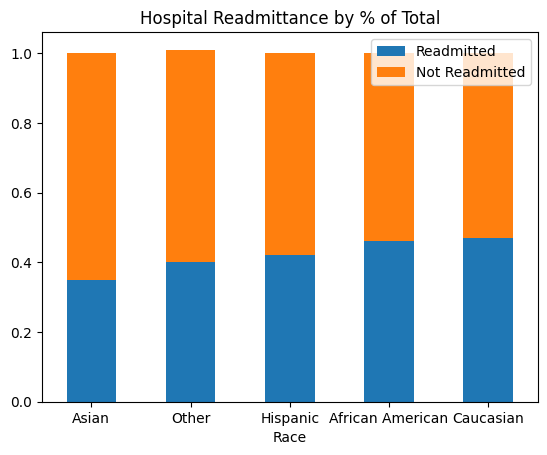

In [ ]:
# creating manual dataframe for final visualization 
dfmanual = pd.DataFrame({'Race' : ['African American', 'Asian', 'Caucasian', 'Hispanic', 'Other'],
                   'Readmitted' : [.46, .35, .47, .42, .40 ],
                   'Not Readmitted' : [.54, .65, .53, .58, .61]})

dfmanual.sort_values('Readmitted').plot.bar(rot=0, stacked=True, x='Race', title='Hospital Readmittance by % of Total')


<Axes: xlabel='Readmitted'>

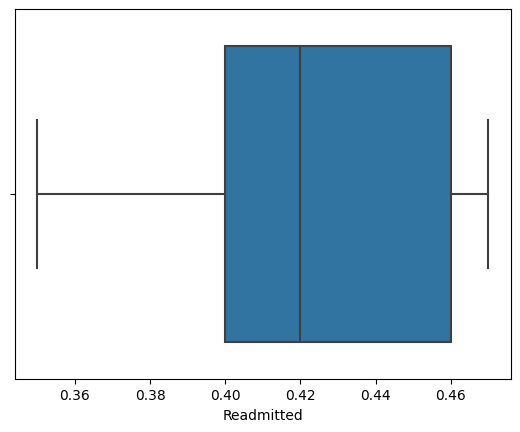

In [ ]:
#throwing in a box/whisker plot in as recently learned
#based on the below we can see that the lowest value is .35 and greatest is .47, range of .12,  the median is .42
sns.boxplot(data=dfmanual, x="Readmitted")



In [ ]:
#Conclusion
#Based on the data I chose to extract, normalize, and compare, Asians appear to have a significantly lower readmittance rate within this data set.